# Utilization of Medical Institutions by District (2014)

Loads the dataset, cleans it, and creates minimal, effective charts:
- Heatmaps for each metric across districts and hospital types
- Averages chart for national context

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
base_dir = "/home/lakmini/Desktop/MDSAI/Data Science/week3/Hands-on Activity : Exploring Government Open Data for Visualization"
csv_path = os.path.join(base_dir, "Utilization of medical institutions by district - 2014.csv")
out_dir = os.path.join(base_dir, "outputs")
os.makedirs(out_dir, exist_ok=True)

sns.set_theme(style="white", font_scale=0.85)

In [2]:
# Load and clean
raw = pd.read_csv(csv_path).rename(columns={"Rdhs Division and Type": "district_metric"})
raw[["district", "metric"]] = raw["district_metric"].str.split("_", n=1, expand=True)

value_cols = raw.columns.difference(["district_metric", "district", "metric"])
raw[value_cols] = raw[value_cols].replace("-", np.nan)
raw[value_cols] = raw[value_cols].apply(pd.to_numeric, errors="coerce")

raw.head()

,district_metric,Teaching Hospitals,Provincial General Hospitals,District General Hospitals,Base Hospitals Type A,Base Hospitals Type B,Divisional Hospitals Type 'A',Divisional Hospitals Type 'B',Divisional Hospitals Type 'C',Other Hospitals,district,metric
0,Colombo_Duration of Stay,3.41,NaN,NaN,1.73,2.89,1.54,1.33,1.44,7.63,Colombo,Duration of Stay
1,Colombo_Bed Turnover Rate,73.00,NaN,NaN,159.35,71.13,65.58,107.88,81.06,40.02,Colombo,Bed Turnover Rate
2,Colombo_Occupancy Rate,71.73,NaN,NaN,78.78,58.62,27.87,42.35,32.37,87.95,Colombo,Occupancy Rate
3,Gampaha_Duration of Stay,3.08,NaN,2.06,2.17,1.20,2.42,1.12,1.72,9.14,Gampaha,Duration of Stay
4,Gampaha_Bed Turnover Rate,91.14,NaN,125.99,119.94,131.67,74.14,140.47,139.25,25.21,Gampaha,Bed Turnover Rate


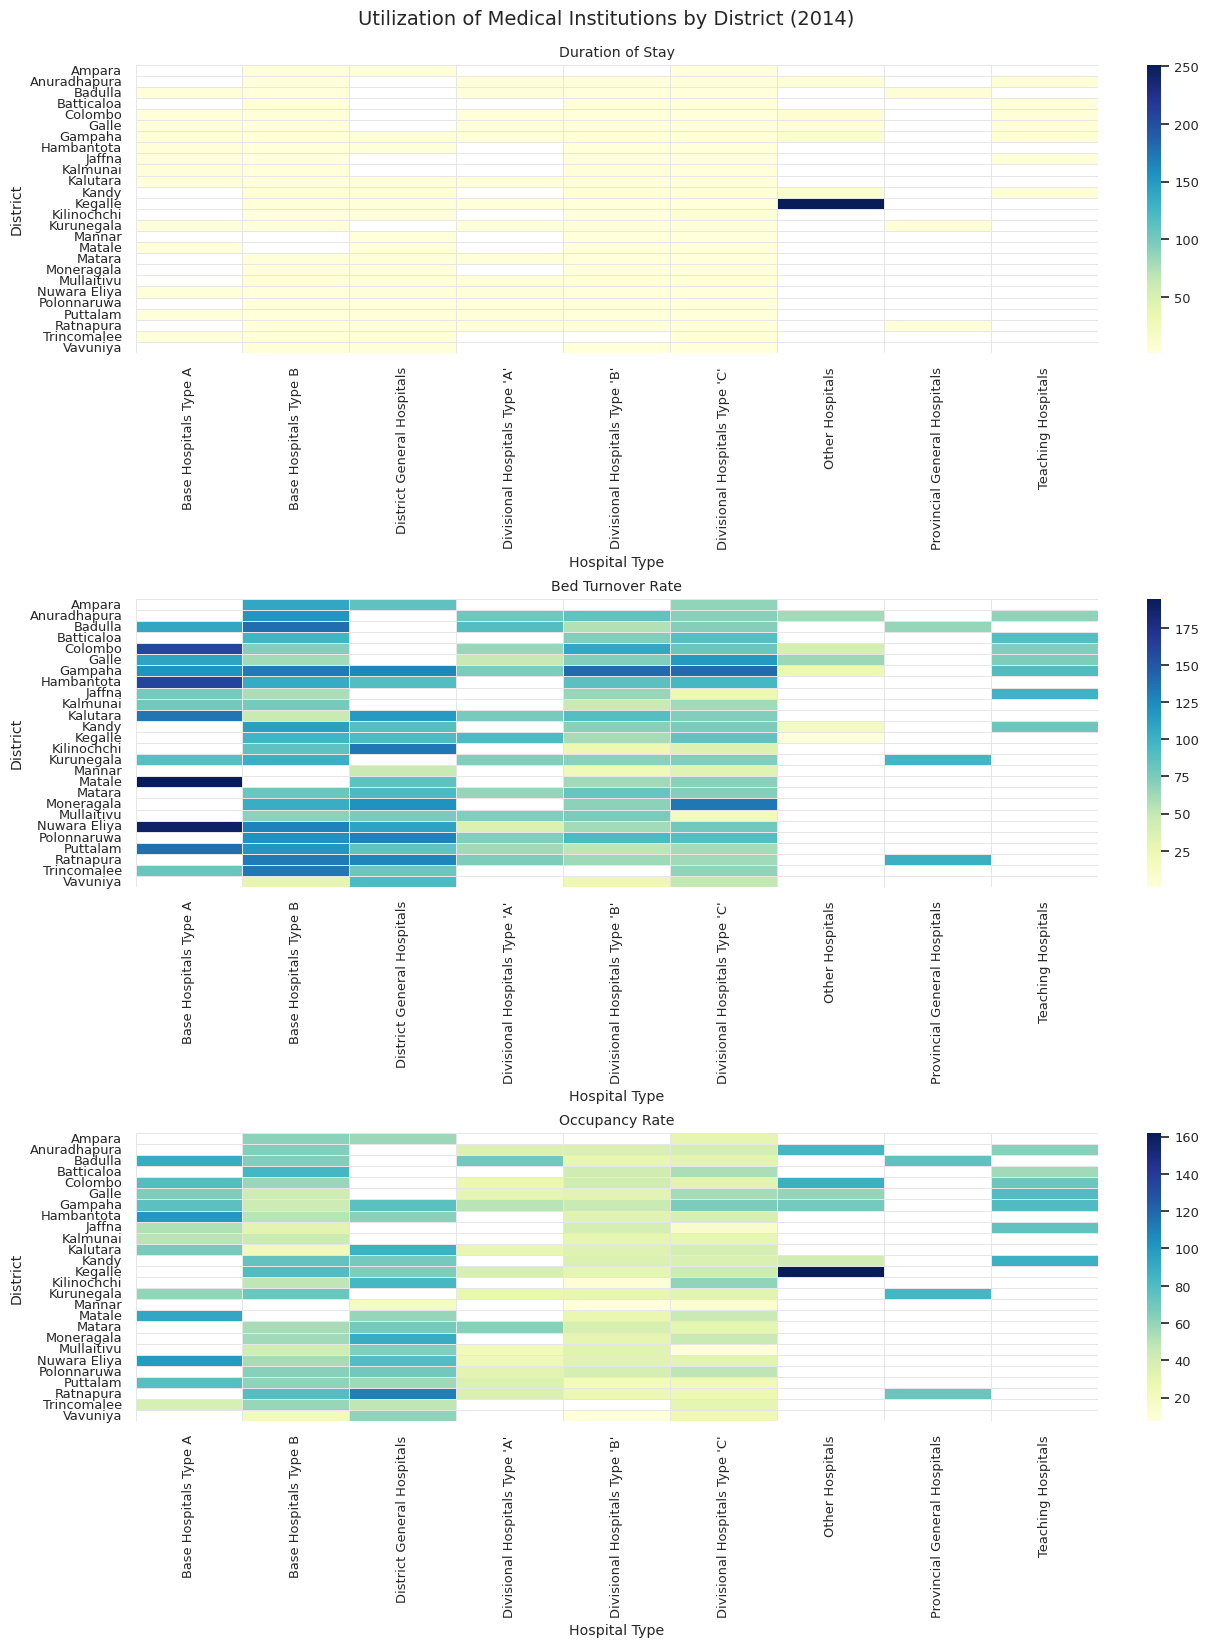

'/home/lakmini/Desktop/MDSAI/Data Science/week3/Hands-on Activity : Exploring Government Open Data for Visualization/outputs/medical_utilization_2014_heatmaps.png'

In [3]:
# Heatmaps for each metric
metrics = ["Duration of Stay", "Bed Turnover Rate", "Occupancy Rate"]
heatmap_df = raw[raw["district"] != "Average"].copy()

fig, axes = plt.subplots(3, 1, figsize=(12, 16), constrained_layout=True)

for ax, metric in zip(axes, metrics):
    pivot = heatmap_df[heatmap_df["metric"] == metric].set_index("district")
    pivot = pivot[value_cols].sort_index()

    sns.heatmap(
        pivot,
        ax=ax,
        cmap="YlGnBu",
        linewidths=0.5,
        linecolor="#e6e6e6",
        mask=pivot.isna(),
        cbar=True,
    )
    ax.set_title(metric)
    ax.set_xlabel("Hospital Type")
    ax.set_ylabel("District")

fig.suptitle("Utilization of Medical Institutions by District (2014)", y=1.02, fontsize=14)

heatmap_path = os.path.join(out_dir, "medical_utilization_2014_heatmaps.png")
fig.savefig(heatmap_path, dpi=200, bbox_inches="tight")
plt.show()

heatmap_path

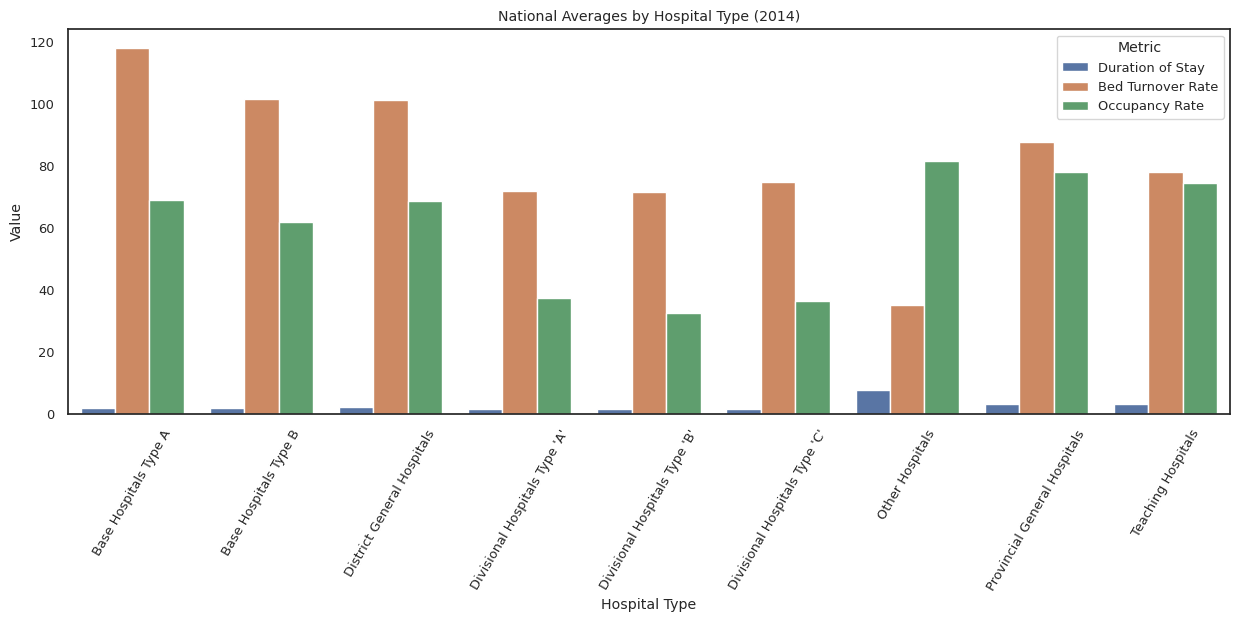

'/home/lakmini/Desktop/MDSAI/Data Science/week3/Hands-on Activity : Exploring Government Open Data for Visualization/outputs/medical_utilization_2014_averages.png'

In [11]:
# Averages by hospital type (national context)
avg = raw[raw["district"] == "Average"].copy()

avg_long = avg.melt(
    id_vars=["district", "metric"],
    value_vars=value_cols,
    var_name="hospital_type",
    value_name="value",
).dropna()

fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(
    data=avg_long,
    x="hospital_type",
    y="value",
    hue="metric",
    ax=ax,
)

ax.set_title("National Averages by Hospital Type (2014)")
ax.set_xlabel("Hospital Type")
ax.set_ylabel("Value")
ax.legend(title="Metric", loc="upper right")
ax.tick_params(axis="x", rotation=60)

avg_path = os.path.join(out_dir, "medical_utilization_2014_averages.png")
fig.savefig(avg_path, dpi=200, bbox_inches="tight")
plt.show()

avg_path